In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [80]:
mem_data = pd.read_csv("mprofile_20190203222010.dat", sep=" ", names=["name", "memory", "time"])
mem_data = mem_data.drop(0)
del mem_data["name"]
mem_data["memory"] = pd.to_numeric(mem_data["memory"])
mem_data["time"] = pd.to_numeric(mem_data["time"])
base_time = mem_data["time"].iloc[0]
mem_data["time"] = mem_data["time"].apply(lambda x: x - base_time)

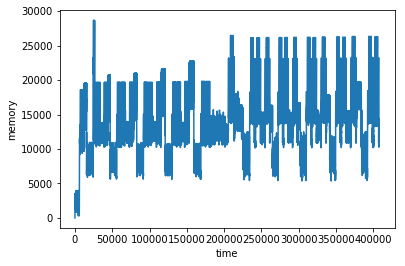

In [81]:
sns.lineplot(x="time", y="memory", data=mem_data)

In [82]:
log_data = pd.read_csv("logfile_fast_vs_prob", sep="  ", header=None)
log_data = log_data[pd.isna(log_data[1])]
del log_data[1]
log_data[0] = log_data[0].apply(lambda x: time.mktime(datetime.strptime(x[:-5], "%Y-%m-%d %H:%M:%S,%f").timetuple()))
base_time = log_data.iloc[0][0]
log_data[0] = log_data[0].apply(lambda x: x - base_time)
log_data.columns = ["time", "logs"]
log_data[:250]

/home/hugo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


time                               logs
0        0.0   Start experiment with config ibc
1        0.0                 Using 5 components
2        0.0            Number of components: 5
3        0.0                        FastSRM 100
4        0.0                       Fitting data
5     5781.0                               Done
6     5781.0         Subject split number 0 / 5
7     5781.0                  Transforming Data
8     5880.0                     Reconstruction
15    7200.0                               Done
16    7200.0         Subject split number 1 / 5
17    7200.0                  Transforming Data
18    7230.0                     Reconstruction
26    8536.0                               Done
27    8536.0         Subject split number 2 / 5
28    8536.0                  Transforming Data
29    8566.0                     Reconstruction
33    9859.0                               Done
34    9859.0         Subject split number 3 / 5
35    9859.0                  Transforming Data
36    9889.0                     Reconstruction
42   11164.0                               Done
43   11164.0         Subject split number 4 / 5
44   11164.0                  Transforming Data
45   11191.0                     Reconstruction
51   12386.0                               Done
52   12386.0                            ProbSRM
53   12386.0                       Fitting data
54   12386.0                        Iteration 1
55   12386.0                    Loading subject
..       ...                                ...
246  15292.0                    Loading subject
247  15295.0                               Done
248  15305.0                    Loading subject
249  15307.0                               Done
250  15318.0                    Loading subject
251  15320.0                               Done
252  15331.0                    Loading subject
253  15333.0                               Done
254  15346.0                    Loading subject
255  15349.0                               Done
256  15360.0                    Loading subject
257  15362.0                               Done
258  15372.0                    Loading subject
259  15375.0                               Done
260  15385.0                    Loading subject
261  15387.0                               Done
262  15398.0                    Loading subject
263  15400.0                               Done
264  15543.0                               Done
265  15543.0         Subject split number 0 / 5
266  15543.0                  Transforming Data
267  15641.0                     Reconstruction
268  15671.0                               Done
269  15671.0         Subject split number 1 / 5
270  15671.0                  Transforming Data
271  15717.0                     Reconstruction
272  15745.0                               Done
273  15745.0         Subject split number 2 / 5
274  15745.0                  Transforming Data
275  15775.0                     Reconstruction

[250 rows x 2 columns]

In [83]:
start_fitting = False
loading_subject = False
algo = None
fit_data = []
for index, logs in log_data.iterrows():
    if "Start experiment with config " in logs["logs"]:
        print(logs["logs"].split("Start experiment with config ")[1] + "-")
        dataset = logs["logs"].split("Start experiment with config ")[1]
    if "Using" in logs["logs"]:
        print("Components " + logs["logs"].split("Using ")[1].split(" components")[0])
        components = float(logs["logs"].split("Using ")[1].split(" components")[0])
    if "SRM" in logs["logs"]:
        print(logs["logs"][1:])
        if algo is not None:
            transforming_time = float(logs["time"]) - start_transforming_time
            fit_data.append(
                [dataset, components, algo, fitting_time, transforming_time, start_fitting_time, start_transforming_time]
            )
        algo = logs["logs"][1:]
    if "Fitting data" in logs["logs"]:
        start_fitting_time = float(logs["time"])
        start_fitting = True
    if "Loading subject" in logs["logs"]:
        loading_subject = True
    if "Done" in logs["logs"]:
        if loading_subject:
            loading_subject = False
        else:
            if start_fitting:
                fitting_time = float(logs["time"]) - start_fitting_time
                start_fitting = False
                print(fitting_time)
    if "Subject split number 0 / 5" in logs["logs"]:
        start_transforming = True
        start_transforming_time = float(logs["time"])
transforming_time = float(logs["time"]) - start_transforming_time
fit_data.append(
    [dataset, components, algo, fitting_time, transforming_time, start_fitting_time, start_transforming_time]
)

ibc-
Components 5
FastSRM 100
5781.0
ProbSRM
3157.0
FastSRM 300
8501.0
FastSRM_dict
626.0
Components 10
FastSRM 100
4926.0
ProbSRM
2612.0
FastSRM 300
8268.0
FastSRM_dict
642.0
Components 20
FastSRM 100
5435.0
ProbSRM
3816.0
FastSRM 300
8655.0
FastSRM_dict
835.0
Components 50
FastSRM 100
5296.0
ProbSRM
5472.0
FastSRM 300
8675.0
FastSRM_dict
794.0
Components 100
FastSRM 100
5253.0
ProbSRM
6302.0
FastSRM 300
8803.0
FastSRM_dict
1077.0
forrest-
Components 5
FastSRM 100
19831.0
ProbSRM
9555.0
FastSRM 300
7186.0
FastSRM_dict
698.0
Components 10
FastSRM 100
5239.0
ProbSRM
3002.0
FastSRM 300
6926.0
FastSRM_dict
691.0
Components 20
FastSRM 100
5112.0
ProbSRM
3301.0
FastSRM 300
7421.0
FastSRM_dict
700.0
Components 50
FastSRM 100
5447.0
ProbSRM
4297.0
FastSRM 300
7249.0
FastSRM_dict
832.0
Components 100
FastSRM 100
5443.0
ProbSRM
6480.0
FastSRM 300
7576.0
FastSRM_dict
1074.0


3
ibc FastSRM_dict 10.0
10901.098034338707


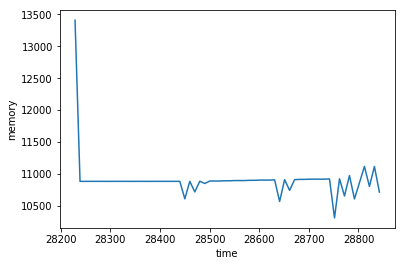

4
ibc FastSRM 100 10.0
12892.744802191839


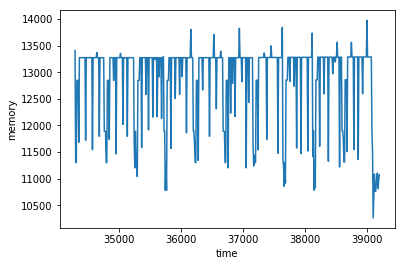

5
ibc ProbSRM 10.0
17681.40410143077


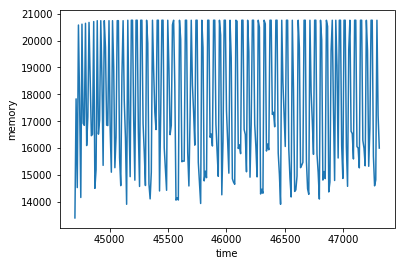

6
ibc FastSRM 300 10.0
9417.079907081508


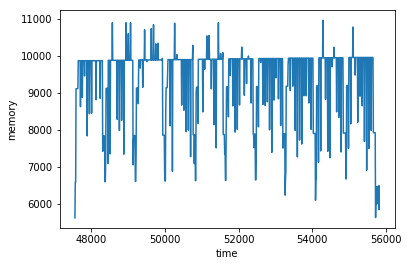

7
ibc FastSRM_dict 20.0
10861.390376999998


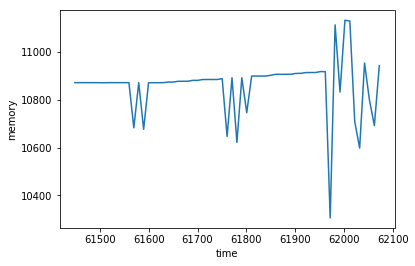

8
ibc FastSRM 100 20.0
12873.122504305555


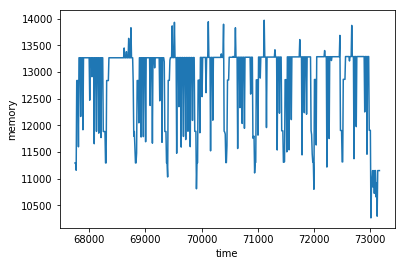

9
ibc ProbSRM 20.0
17943.31059322955


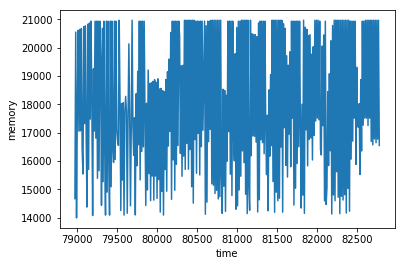

10
ibc FastSRM 300 20.0
9318.711332709303


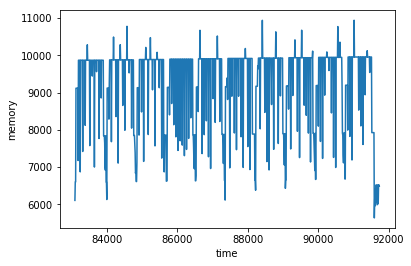

11
ibc FastSRM_dict 50.0
10827.766001397591


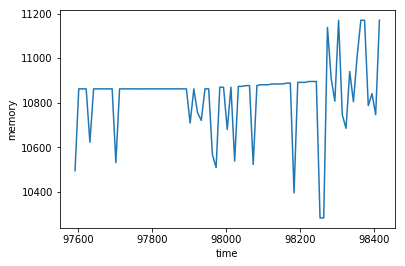

12
ibc FastSRM 100 50.0
12843.405694045541


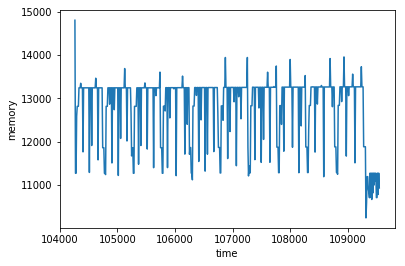

13
ibc ProbSRM 50.0
19001.292846545955


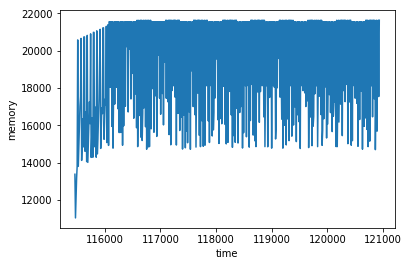

14
ibc FastSRM 300 50.0
9273.608831208818


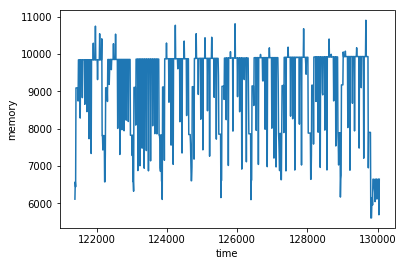

15
ibc FastSRM_dict 100.0
10863.802759025319


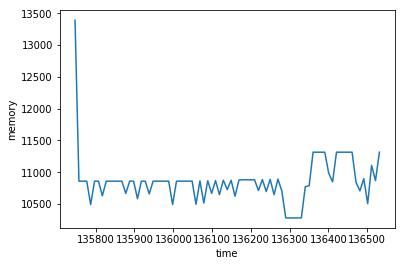

16
ibc FastSRM 100 100.0
12815.67042317433


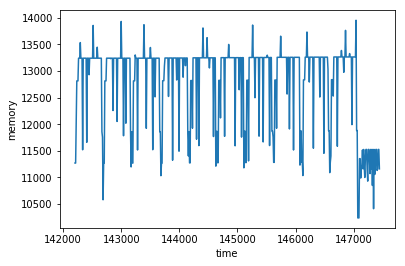

17
ibc ProbSRM 100.0
20593.550307658694


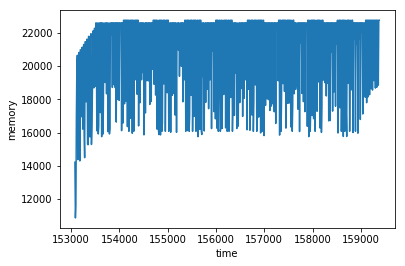

18
ibc FastSRM 300 100.0
9225.483883965715


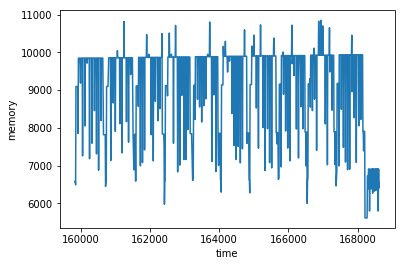

23
forrest FastSRM_dict 10.0
10861.168025289855


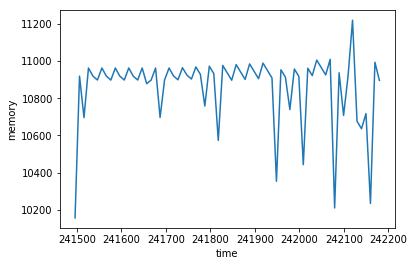

24
forrest FastSRM 100 10.0
13559.244519285989


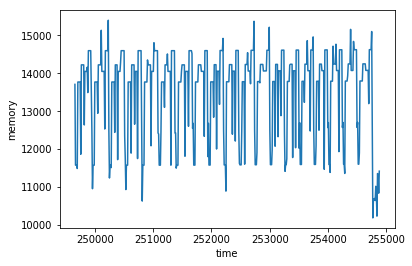

25
forrest ProbSRM 10.0
14647.450424711411


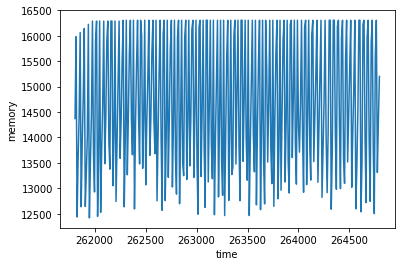

26
forrest FastSRM 300 10.0
9763.626173573295


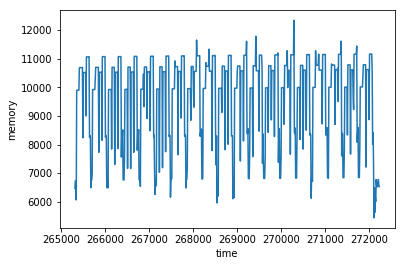

27
forrest FastSRM_dict 20.0
10952.327320823528


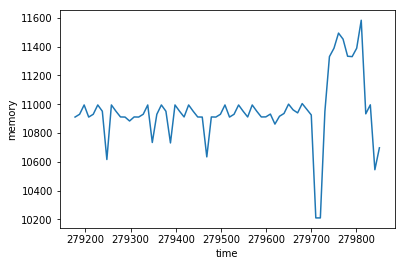

28
forrest FastSRM 100 20.0
13463.706654511812


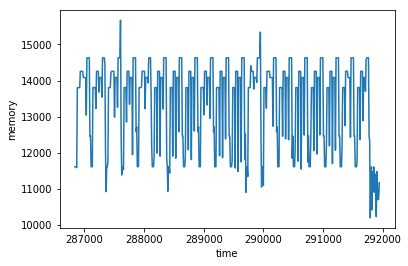

29
forrest ProbSRM 20.0
15063.855123405487


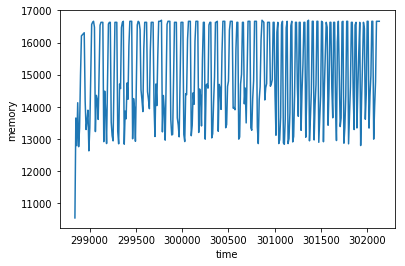

30
forrest FastSRM 300 20.0
9793.028439382113


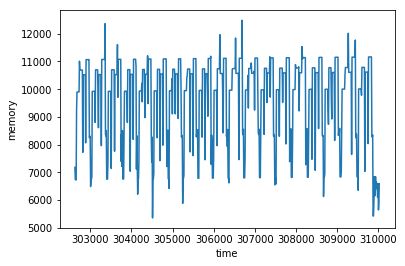

31
forrest FastSRM_dict 50.0
10907.078747768117


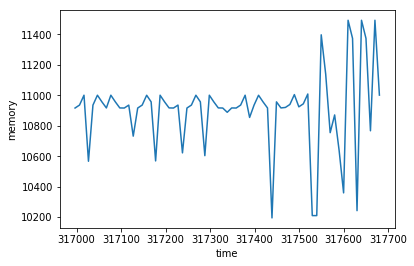

32
forrest FastSRM 100 50.0
13466.501470204797


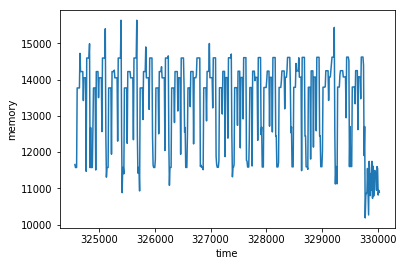

33
forrest ProbSRM 50.0
16365.290425517564


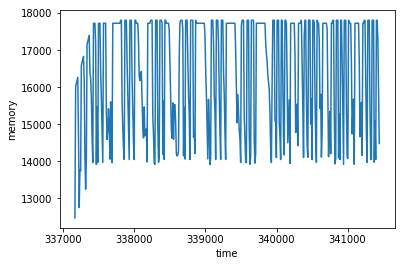

34
forrest FastSRM 300 50.0
9672.593500500001


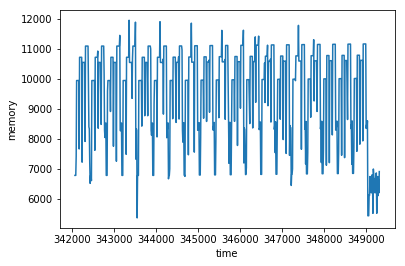

35
forrest FastSRM_dict 100.0
11023.71983245783


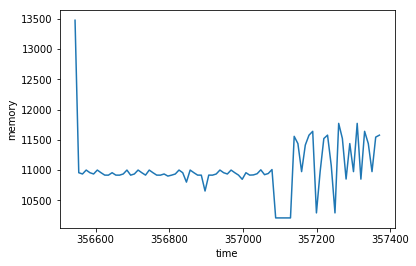

36
forrest FastSRM 100 100.0
13359.669639753703


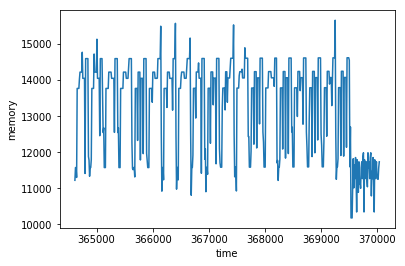

37
forrest ProbSRM 100.0
18221.671668433904


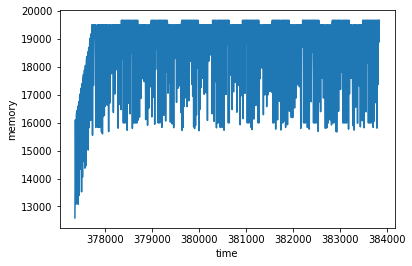

38
forrest FastSRM 300 100.0
9645.807867544489


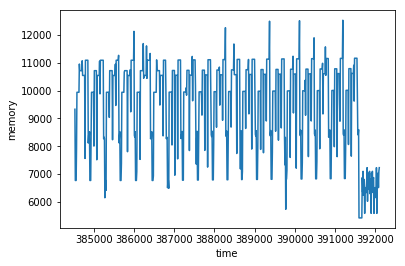

39
forrest FastSRM_dict 100.0
11070.960311056604


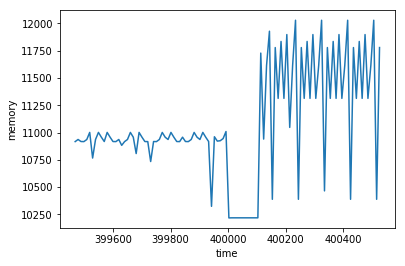

In [84]:
logs_data = pd.DataFrame(fit_data, columns=["dataset", "components", "algo", "fit_duration", "transform_duration", "fit_time", "transform_time"])
logs_data = logs_data[logs_data["components"] != 5]
logs_data["fit_memory"] = 0
for index, plot_data in logs_data.iterrows():
    print(index)
    dataset = plot_data["dataset"]
    algo = plot_data["algo"]
    components = plot_data["components"]
    print(dataset, algo, components)
    test = plot_data
    plt.figure()
    plot_data = mem_data[(test["fit_time"] <= mem_data["time"]) & (mem_data["time"] < test["fit_time"] + test["fit_duration"])]
    sns.lineplot(x="time", y="memory", data=plot_data)
    print(plot_data["memory"].mean())
    plt.show()
    logs_data.loc[index, "fit_memory"] = plot_data["memory"].mean()

In [85]:
logs_data.head()

dataset  components          algo  fit_duration  transform_duration  \
3     ibc        10.0  FastSRM_dict         626.0              5434.0   
4     ibc        10.0   FastSRM 100        4926.0              5489.0   
5     ibc        10.0       ProbSRM        2612.0               241.0   
6     ibc        10.0   FastSRM 300        8268.0              5617.0   
7     ibc        20.0  FastSRM_dict         642.0              5655.0   

   fit_time  transform_time    fit_memory  
3   28226.0         28852.0  10901.098034  
4   34286.0         39212.0  12892.744802  
5   44701.0         47313.0  17681.404101  
6   47554.0         55822.0   9417.079907  
7   61439.0         62081.0  10861.390377

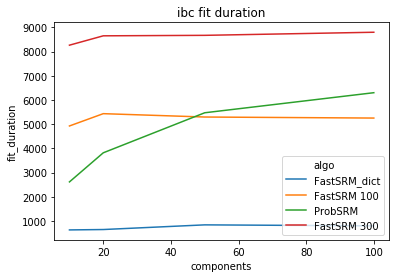

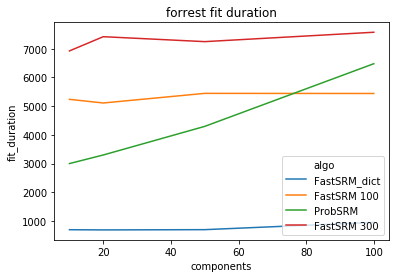

In [86]:
for dataset in ["ibc", "forrest"]:
    plt.figure()
    plt.title(dataset + " fit duration")
    sns.lineplot(x="components", y="fit_duration", data=logs_data[logs_data["dataset"] == dataset], hue="algo")

In [87]:
logs_data

dataset  components          algo  fit_duration  transform_duration  \
3       ibc        10.0  FastSRM_dict         626.0              5434.0   
4       ibc        10.0   FastSRM 100        4926.0              5489.0   
5       ibc        10.0       ProbSRM        2612.0               241.0   
6       ibc        10.0   FastSRM 300        8268.0              5617.0   
7       ibc        20.0  FastSRM_dict         642.0              5655.0   
8       ibc        20.0   FastSRM 100        5435.0              5794.0   
9       ibc        20.0       ProbSRM        3816.0               309.0   
10      ibc        20.0   FastSRM 300        8655.0              5840.0   
11      ibc        50.0  FastSRM_dict         835.0              5839.0   
12      ibc        50.0   FastSRM 100        5296.0              5909.0   
13      ibc        50.0       ProbSRM        5472.0               440.0   
14      ibc        50.0   FastSRM 300        8675.0              5694.0   
15      ibc       100.0  FastSRM_dict         794.0              5655.0   
16      ibc       100.0   FastSRM 100        5253.0              5633.0   
17      ibc       100.0       ProbSRM        6302.0               441.0   
18      ibc       100.0   FastSRM 300        8803.0              5775.0   
23  forrest        10.0  FastSRM_dict         698.0              7463.0   
24  forrest        10.0   FastSRM 100        5239.0              6908.0   
25  forrest        10.0       ProbSRM        3002.0               510.0   
26  forrest        10.0   FastSRM 300        6926.0              6930.0   
27  forrest        20.0  FastSRM_dict         691.0              6974.0   
28  forrest        20.0   FastSRM 100        5112.0              6892.0   
29  forrest        20.0       ProbSRM        3301.0               483.0   
30  forrest        20.0   FastSRM 300        7421.0              6946.0   
31  forrest        50.0  FastSRM_dict         700.0              6884.0   
32  forrest        50.0   FastSRM 100        5447.0              7139.0   
33  forrest        50.0       ProbSRM        4297.0               607.0   
34  forrest        50.0   FastSRM 300        7249.0              7232.0   
35  forrest       100.0  FastSRM_dict         832.0              7233.0   
36  forrest       100.0   FastSRM 100        5443.0              7307.0   
37  forrest       100.0       ProbSRM        6480.0               693.0   
38  forrest       100.0   FastSRM 300        7576.0              7355.0   
39  forrest       100.0  FastSRM_dict        1074.0              7516.0   

    fit_time  transform_time    fit_memory  
3    28226.0         28852.0  10901.098034  
4    34286.0         39212.0  12892.744802  
5    44701.0         47313.0  17681.404101  
6    47554.0         55822.0   9417.079907  
7    61439.0         62081.0  10861.390377  
8    67736.0         73171.0  12873.122504  
9    78965.0         82781.0  17943.310593  
10   83090.0         91745.0   9318.711333  
11   97585.0         98420.0  10827.766001  
12  104259.0        109555.0  12843.405694  
13  115464.0        120936.0  19001.292847  
14  121376.0        130051.0   9273.608831  
15  135745.0        136539.0  10863.802759  
16  142194.0        147447.0  12815.670423  
17  153080.0        159382.0  20593.550308  
18  159823.0        168626.0   9225.483884  
23  241491.0        242189.0  10861.168025  
24  249652.0        254891.0  13559.244519  
25  261799.0        264801.0  14647.450425  
26  265311.0        272237.0   9763.626174  
27  279167.0        279858.0  10952.327321  
28  286832.0        291944.0  13463.706655  
29  298836.0        302137.0  15063.855123  
30  302620.0        310041.0   9793.028439  
31  316987.0        317687.0  10907.078748  
32  324571.0        330018.0  13466.501470  
33  337157.0        341454.0  16365.290426  
34  342061.0        349310.0   9672.593501  
35  356542.0        357374.0  11023.719832  
36  364607.0        370050.0  13359.669640  
37  377357.0        383837.0  18221.671668  
38  384530.0 

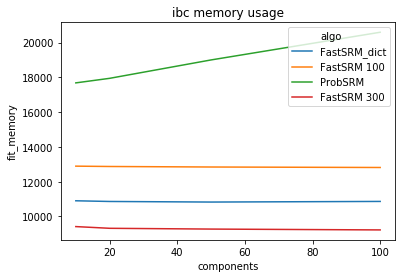

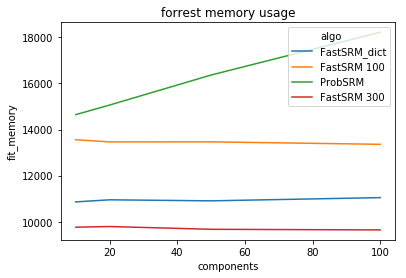

In [88]:
for dataset in ["ibc", "forrest"]:
    plt.figure()
    plt.title(dataset + " memory usage")
    sns.lineplot(x="components", y="fit_memory", data=logs_data[logs_data["dataset"] == dataset], hue="algo")

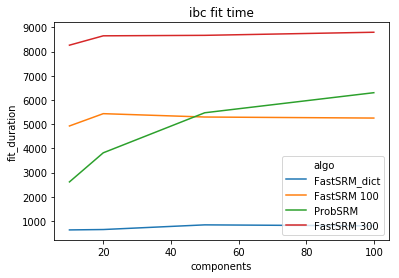

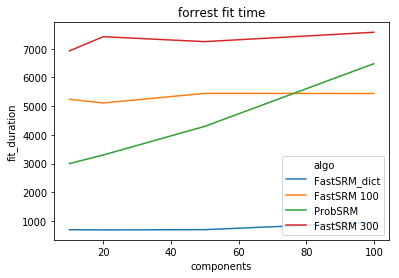

In [89]:
for dataset in ["ibc", "forrest"]:
    plt.figure()
    plt.title(dataset + " fit time")
    sns.lineplot(x="components", y="fit_duration", data=logs_data[logs_data["dataset"] == dataset], hue="algo")

In [90]:
data = pd.read_csv("fast_vs_prob.csv")
del data["Unnamed: 0"]
data.head()

dataset  components         algo test_sessions              action  \
0  raiders           5  FastSRM 100         [0 1]       start fitting   
1  raiders           5  FastSRM 100         [0 1]        done fitting   
2  raiders           5  FastSRM 100         [0 1]  start transforming   
3  raiders           5  FastSRM 100         [0 1]   done transforming   
4  raiders           5      ProbSRM         [0 1]       start fitting   

          time  
0     0.747875  
1  2745.815346  
2  2745.816910  
3  2888.534871  
4  2888.535356

In [91]:
mem_data = pd.read_csv("mprofile_20190223165943.dat", sep=" ", names=["name", "memory", "time"])
mem_data = mem_data.drop(0)
del mem_data["name"]
mem_data["memory"] = pd.to_numeric(mem_data["memory"])
mem_data["time"] = pd.to_numeric(mem_data["time"])
base_time = mem_data["time"].iloc[0]
mem_data["time"] = mem_data["time"].apply(lambda x: x - base_time)

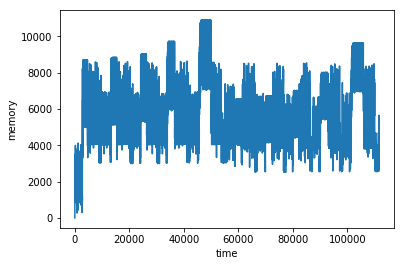

In [92]:
sns.lineplot(x="time", y="memory", data=mem_data)

In [93]:
log_data = pd.read_csv("logfile_fast_vs_prob2", sep="  ", header=None)
log_data = log_data[pd.isna(log_data[1])]
del log_data[1]
log_data[0] = log_data[0].apply(lambda x: time.mktime(datetime.strptime(x[:-5], "%Y-%m-%d %H:%M:%S,%f").timetuple()))
base_time = log_data.iloc[0][0]
log_data[0] = log_data[0].apply(lambda x: x - base_time)
log_data.columns = ["time", "logs"]
log_data[:250]

/home/hugo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


time                                   logs
0       0.0   Start experiment with config raiders
1       1.0                     Using 5 components
2       1.0                Number of components: 5
3       1.0                            FastSRM 100
4       1.0                           Fitting data
5    2746.0                                   Done
6    2746.0             Subject split number 0 / 5
7    2746.0                      Transforming Data
8    2763.0                         Reconstruction
9    2779.0                                   Done
10   2779.0             Subject split number 1 / 5
11   2779.0                      Transforming Data
12   2793.0                         Reconstruction
13   2808.0                                   Done
14   2808.0             Subject split number 2 / 5
15   2808.0                      Transforming Data
16   2821.0                         Reconstruction
17   2835.0                                   Done
18   2835.0             Subject split number 3 / 5
19   2835.0                      Transforming Data
20   2848.0                         Reconstruction
21   2862.0                                   Done
22   2862.0             Subject split number 4 / 5
23   2862.0                      Transforming Data
24   2875.0                         Reconstruction
25   2889.0                                   Done
26   2889.0                                ProbSRM
27   2889.0                           Fitting data
28   2889.0                            Iteration 1
29   2889.0                        Loading subject
..      ...                                    ...
220  4476.0                        Loading subject
221  4478.0                                   Done
222  4487.0                        Loading subject
223  4488.0                                   Done
224  4497.0                        Loading subject
225  4498.0                                   Done
226  4508.0                        Loading subject
227  4510.0                                   Done
228  4519.0                        Loading subject
229  4521.0                                   Done
230  4532.0                        Loading subject
231  4533.0                                   Done
232  4547.0                        Loading subject
233  4549.0                                   Done
234  4557.0                        Loading subject
235  4558.0                                   Done
236  4569.0                        Loading subject
237  4571.0                                   Done
238  4671.0                                   Done
239  4671.0             Subject split number 0 / 5
240  4671.0                      Transforming Data
241  4692.0                         Reconstruction
242  4707.0                                   Done
243  4707.0             Subject split number 1 / 5
244  4707.0                      Transforming Data
245  4724.0                         Reconstruction
246  4739.0                                   Done
247  4739.0             Subject split number 2 / 5
248  4739.0                      Transforming Data
249  4756.0                         Reconstruction

[250 rows x 2 columns]

In [94]:
start_fitting = False
loading_subject = False
algo = None
fit_data = []
for index, logs in log_data.iterrows():
    if "Start experiment with config " in logs["logs"]:
        print(logs["logs"].split("Start experiment with config ")[1] + "-")
        dataset = logs["logs"].split("Start experiment with config ")[1]
    if "Using" in logs["logs"]:
        print("Components " + logs["logs"].split("Using ")[1].split(" components")[0])
        components = float(logs["logs"].split("Using ")[1].split(" components")[0])
    if "SRM" in logs["logs"]:
        print(logs["logs"][1:])
        if algo is not None:
            transforming_time = float(logs["time"]) - start_transforming_time
            fit_data.append(
                [dataset, components, algo, fitting_time, transforming_time, start_fitting_time, start_transforming_time]
            )
        algo = logs["logs"][1:]
    if "Fitting data" in logs["logs"]:
        start_fitting_time = float(logs["time"])
        start_fitting = True
    if "Loading subject" in logs["logs"]:
        loading_subject = True
    if "Done" in logs["logs"]:
        if loading_subject:
            loading_subject = False
        else:
            if start_fitting:
                fitting_time = float(logs["time"]) - start_fitting_time
                start_fitting = False
                print(fitting_time)
    if "Subject split number 0 / 5" in logs["logs"]:
        start_transforming = True
        start_transforming_time = float(logs["time"])
transforming_time = float(logs["time"]) - start_transforming_time
fit_data.append(
    [dataset, components, algo, fitting_time, transforming_time, start_fitting_time, start_transforming_time]
)

raiders-
Components 5
FastSRM 100
2745.0
ProbSRM
1782.0
FastSRM 300
4103.0
FastSRM_dict
434.0
Components 10
FastSRM 100
3386.0
ProbSRM
2112.0
FastSRM 300
4893.0
FastSRM_dict
452.0
Components 20
FastSRM 100
2710.0
ProbSRM
2194.0
FastSRM 300
3802.0
FastSRM_dict
440.0
Components 50
FastSRM 100
2679.0
ProbSRM
2641.0
FastSRM 300
4567.0
FastSRM_dict
515.0
Components 100
FastSRM 100
3016.0
ProbSRM
4283.0
FastSRM 300
3854.0
FastSRM_dict
670.0
sherlock-
Components 5
FastSRM 100
3245.0
ProbSRM
2373.0
FastSRM 300
4761.0
FastSRM_dict
437.0
Components 10
FastSRM 100
2890.0
ProbSRM
2429.0
FastSRM 300
4130.0
FastSRM_dict
446.0
Components 20
FastSRM 100
2611.0
ProbSRM
1995.0
FastSRM 300
4095.0
FastSRM_dict
481.0
Components 50
FastSRM 100
2692.0
ProbSRM
2955.0
FastSRM 300
4170.0
FastSRM_dict
562.0
Components 100
FastSRM 100
2813.0
ProbSRM
4522.0
FastSRM 300
4263.0
FastSRM_dict
773.0


3
raiders FastSRM_dict 10.0
3668.329851


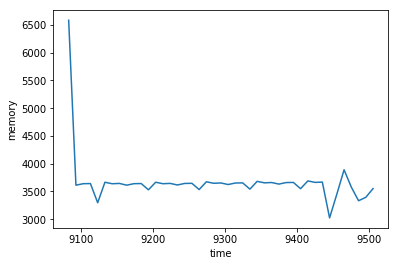

4
raiders FastSRM 100 10.0
5678.650262770833


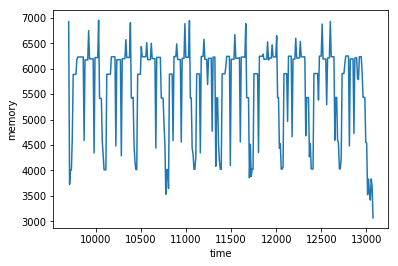

5
raiders ProbSRM 10.0
7091.1357699857135


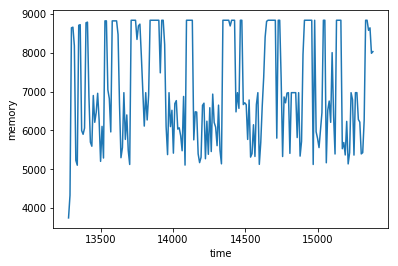

6
raiders FastSRM 300 10.0
6776.833405711934


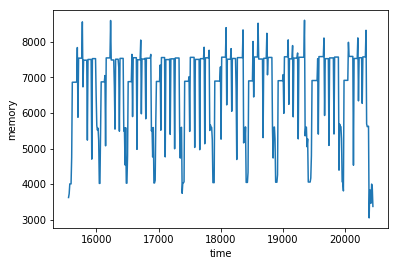

7
raiders FastSRM_dict 20.0
3664.7856770666667


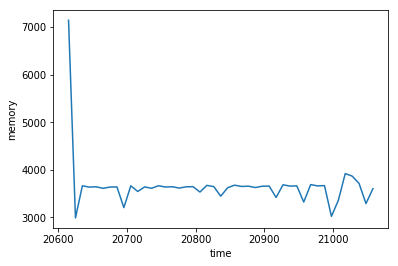

8
raiders FastSRM 100 20.0
5558.930050524164


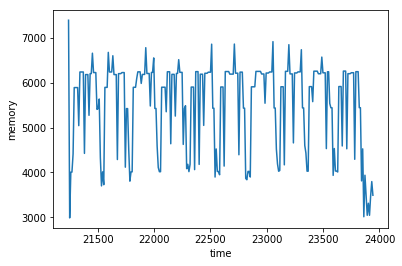

9
raiders ProbSRM 20.0
7530.078232394495


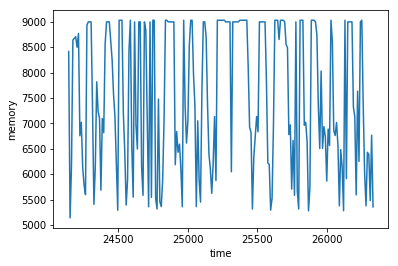

10
raiders FastSRM 300 20.0
6719.5873466206895


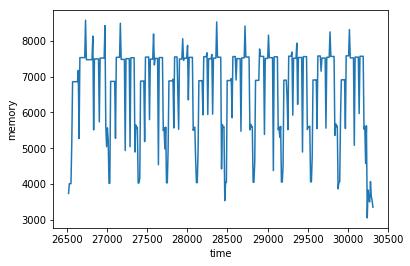

11
raiders FastSRM_dict 50.0
3597.6160973023248


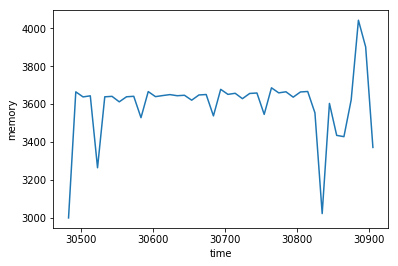

12
raiders FastSRM 100 50.0
5567.427602180451


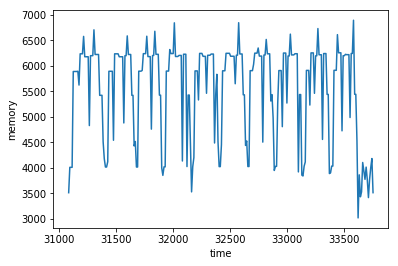

13
raiders ProbSRM 50.0
8287.854768122137


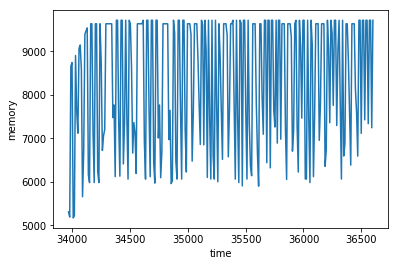

14
raiders FastSRM 300 50.0
6670.435194110131


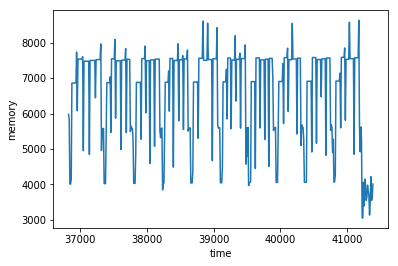

15
raiders FastSRM_dict 100.0
3604.4035691176473


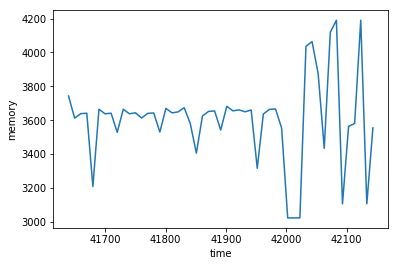

16
raiders FastSRM 100 100.0
5510.556895334448


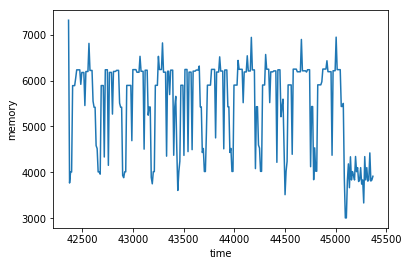

17
raiders ProbSRM 100.0
9439.929108442353


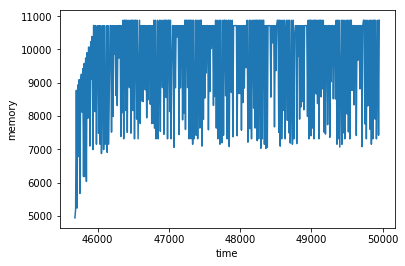

18
raiders FastSRM 300 100.0
6576.007740903141


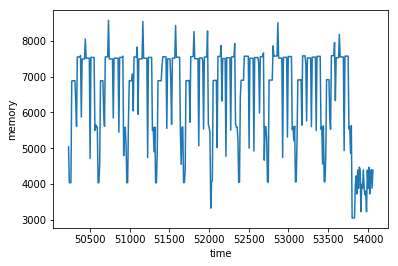

23
sherlock FastSRM_dict 10.0
3174.6871448863635


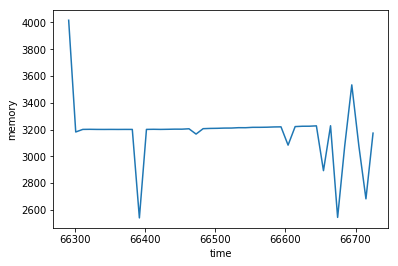

24
sherlock FastSRM 100 10.0
5314.878443505227


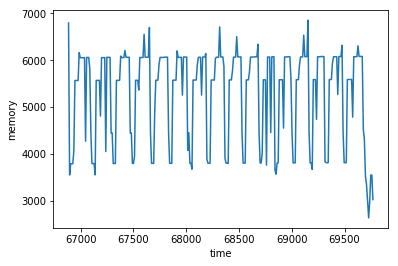

25
sherlock ProbSRM 10.0
5456.601756937759


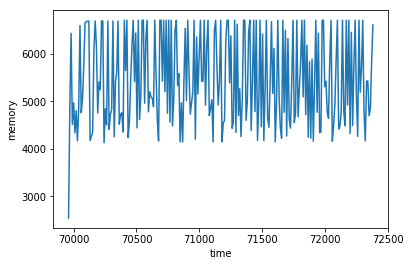

26
sherlock FastSRM 300 10.0
6313.743959580488


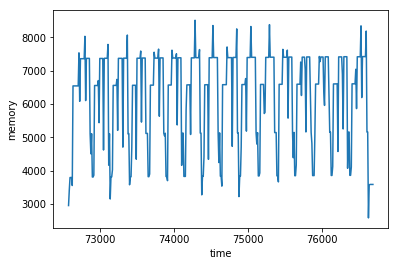

27
sherlock FastSRM_dict 20.0
3178.4602272045454


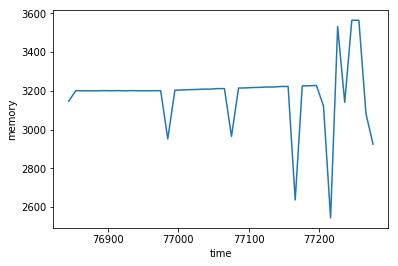

28
sherlock FastSRM 100 20.0
5226.3234947722


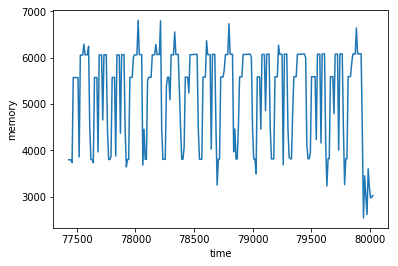

29
sherlock ProbSRM 20.0
5866.556561671717


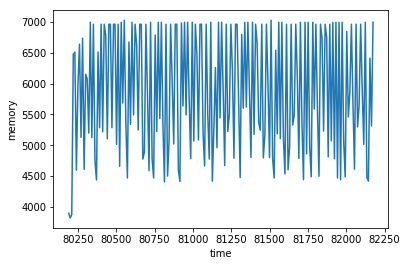

30
sherlock FastSRM 300 20.0
6279.296606243242


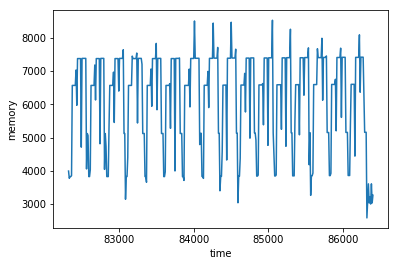

31
sherlock FastSRM_dict 50.0
3230.231282666666


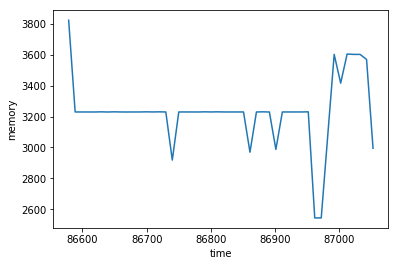

32
sherlock FastSRM 100 50.0
5141.90304594382


33
sherlock ProbSRM 50.0
6992.049767993173


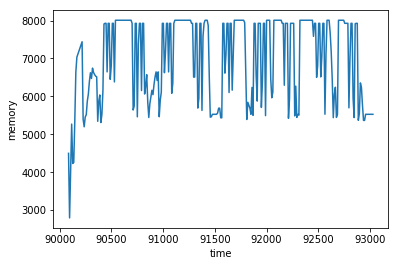

34
sherlock FastSRM 300 50.0
6204.925412348668


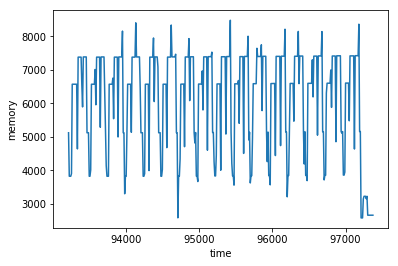

35
sherlock FastSRM_dict 100.0
3145.0522460535713


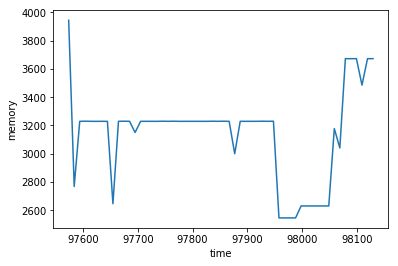

36
sherlock FastSRM 100 100.0
5134.427237315412


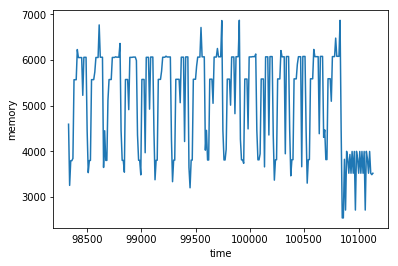

37
sherlock ProbSRM 100.0
8466.259439242762


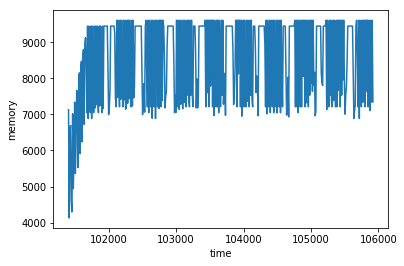

38
sherlock FastSRM 300 100.0
6141.375425777252


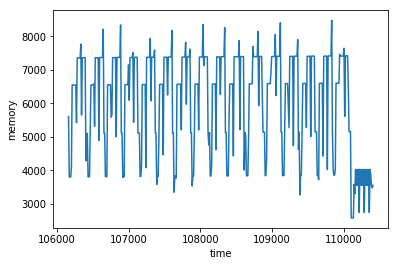

39
sherlock FastSRM_dict 100.0
3209.236688052632


In [95]:
logs_data2 = pd.DataFrame(fit_data, columns=["dataset", "components", "algo", "fit_duration", "transform_duration", "fit_time", "transform_time"])
logs_data2 = logs_data2[logs_data2["components"] != 5]
logs_data2["fit_memory"] = 0
for index, plot_data in logs_data2.iterrows():
    print(index)
    dataset = plot_data["dataset"]
    algo = plot_data["algo"]
    components = plot_data["components"]
    print(dataset, algo, components)
    test = plot_data
    plt.figure()
    plot_data = mem_data[(test["fit_time"] <= mem_data["time"]) & (mem_data["time"] < test["fit_time"] + test["fit_duration"])]
    sns.lineplot(x="time", y="memory", data=plot_data)
    print(plot_data["memory"].mean())
    plt.show()
    logs_data2.loc[index, "fit_memory"] = plot_data["memory"].mean()

In [96]:
logs_data.head()

dataset  components          algo  fit_duration  transform_duration  \
3     ibc        10.0  FastSRM_dict         626.0              5434.0   
4     ibc        10.0   FastSRM 100        4926.0              5489.0   
5     ibc        10.0       ProbSRM        2612.0               241.0   
6     ibc        10.0   FastSRM 300        8268.0              5617.0   
7     ibc        20.0  FastSRM_dict         642.0              5655.0   

   fit_time  transform_time    fit_memory  
3   28226.0         28852.0  10901.098034  
4   34286.0         39212.0  12892.744802  
5   44701.0         47313.0  17681.404101  
6   47554.0         55822.0   9417.079907  
7   61439.0         62081.0  10861.390377

In [97]:
logs_data2.head()

dataset  components          algo  fit_duration  transform_duration  \
3  raiders        10.0  FastSRM_dict         434.0               180.0   
4  raiders        10.0   FastSRM 100        3386.0               194.0   
5  raiders        10.0       ProbSRM        2112.0               167.0   
6  raiders        10.0   FastSRM 300        4893.0               167.0   
7  raiders        20.0  FastSRM_dict         452.0               173.0   

   fit_time  transform_time   fit_memory  
3    9080.0          9514.0  3668.329851  
4    9694.0         13080.0  5678.650263  
5   13274.0         15386.0  7091.135770  
6   15553.0         20446.0  6776.833406  
7   20613.0         21065.0  3664.785677

In [98]:
data = np.concatenate([logs_data.values, logs_data2.values], axis=0)
logs_data3 = pd.DataFrame(data, columns=logs_data.columns)
logs_data3["fit_duration"] = pd.to_numeric(logs_data3["fit_duration"])
logs_data3["fit_time"] = pd.to_numeric(logs_data3["fit_time"])
logs_data3["transform_time"] = pd.to_numeric(logs_data3["transform_time"])
logs_data3["fit_memory"] = pd.to_numeric(logs_data3["fit_memory"])
logs_data3["transform_duration"] = pd.to_numeric(logs_data3["transform_duration"])
logs_data3.head()

dataset components          algo  fit_duration  transform_duration  \
0     ibc         10  FastSRM_dict         626.0              5434.0   
1     ibc         10   FastSRM 100        4926.0              5489.0   
2     ibc         10       ProbSRM        2612.0               241.0   
3     ibc         10   FastSRM 300        8268.0              5617.0   
4     ibc         20  FastSRM_dict         642.0              5655.0   

   fit_time  transform_time    fit_memory  
0   28226.0         28852.0  10901.098034  
1   34286.0         39212.0  12892.744802  
2   44701.0         47313.0  17681.404101  
3   47554.0         55822.0   9417.079907  
4   61439.0         62081.0  10861.390377

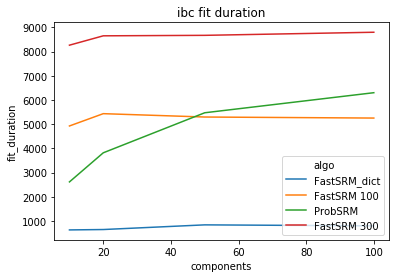

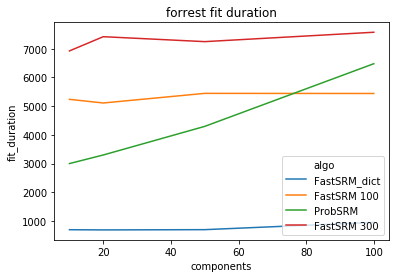

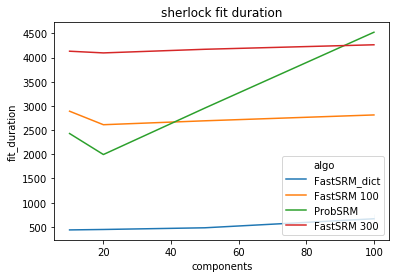

In [99]:
for dataset in ["ibc", "forrest", "raiders", "sherlock"]:
    plt.figure()
    plt.title(dataset + " fit duration")
    sns.lineplot(x="components", y="fit_duration", data=logs_data3[logs_data3["dataset"] == dataset], hue="algo")

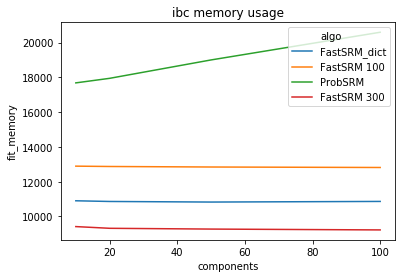

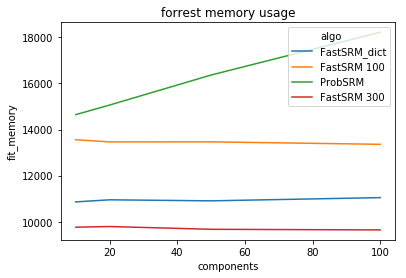

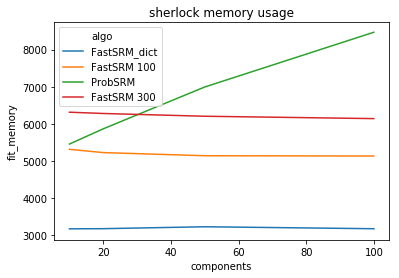

In [101]:
for dataset in ["ibc", "forrest", "raiders", "sherlock"]:
    plt.figure()
    plt.title(dataset + " memory usage")
    sns.lineplot(x="components", y="fit_memory", data=logs_data3[logs_data3["dataset"] == dataset], hue="algo")

In [102]:
logfile = pd.read_csv("fast_vs_prob.csv")

In [109]:
mem_data = pd.read_csv("mprofile_20190223165943.dat", sep=" ", names=["name", "memory", "time"])
mem_data = mem_data.drop(0)
del mem_data["name"]
mem_data["memory"] = pd.to_numeric(mem_data["memory"])
mem_data["time"] = pd.to_numeric(mem_data["time"])
base_time = mem_data["time"].iloc[0]
mem_data["time"] = mem_data["time"].apply(lambda x: x - base_time)

In [110]:
logfile.head()

Unnamed: 0  dataset  components         algo test_sessions  \
0           0  raiders           5  FastSRM 100         [0 1]   
1           1  raiders           5  FastSRM 100         [0 1]   
2           2  raiders           5  FastSRM 100         [0 1]   
3           3  raiders           5  FastSRM 100         [0 1]   
4           4  raiders           5      ProbSRM         [0 1]   

               action         time  
0       start fitting     0.747875  
1        done fitting  2745.815346  
2  start transforming  2745.816910  
3   done transforming  2888.534871  
4       start fitting  2888.535356

In [115]:
logfile["action_num"] = pd.to_numeric(logfile["action"].apply(lambda x: {"start fitting": 0,
                                                           "done fitting": 1,
                                                           "start transforming": 2,
                                                          "done transforming":3}[x]))

In [116]:
logfile.head()

Unnamed: 0  dataset  components         algo test_sessions  \
0           0  raiders           5  FastSRM 100         [0 1]   
1           1  raiders           5  FastSRM 100         [0 1]   
2           2  raiders           5  FastSRM 100         [0 1]   
3           3  raiders           5  FastSRM 100         [0 1]   
4           4  raiders           5      ProbSRM         [0 1]   

               action         time  action_num  
0       start fitting     0.747875           0  
1        done fitting  2745.815346           1  
2  start transforming  2745.816910           2  
3   done transforming  2888.534871           3  
4       start fitting  2888.535356           0

In [111]:
mem_data.head()

memory     time
1     1.355469   0.0000
2   120.964844  10.0662
3  1172.339844  20.1374
4  1172.496094  30.2138
5  1448.867188  40.2867

In [125]:
logfile[(logfile["components"] == 10) & 
                          (logfile["dataset"] == "raiders")]["time"]

16     9694.021469
17    13079.471090
18    13079.472088
19    13273.547607
20    13273.548408
21    15385.607364
22    15385.608141
23    15552.342578
24    15552.366661
25    20445.364891
26    20445.365949
27    20612.470892
28    20612.471755
29    21065.253922
30    21065.254655
31    21237.719345
Name: time, dtype: float64

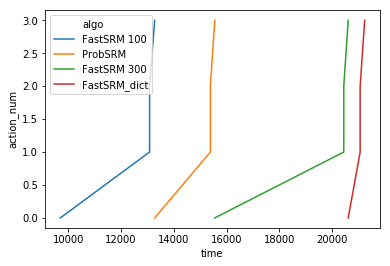

In [123]:
sns.lineplot(data=logfile[(logfile["components"] == 10) & 
                          (logfile["dataset"] == "raiders")], x="time", y="action_num", hue="algo")


(9694.021469, 21237.719345)

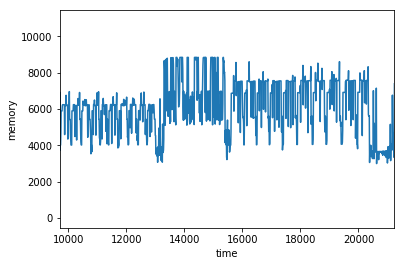

In [127]:
sns.lineplot(data=mem_data, x="time", y="memory")
plt.xlim([9694.021469, 21237.719345])